

# Oumaima Merhbene 
# **-Dataviz project-**



---
---

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **1) Analyze matched_sales:**





In [ ]:
df1=pd.read_csv('/content/gdrive/My Drive/matched_sales.tsv',sep="\t")

In [ ]:
df1.head(10)

Timestamp Environment  ...                    Transaction ID Order Value
0  1569889040         web  ...  687260E81F123BF7B22EB42E2CC740D9       32.08
1  1569890180         web  ...  4CA9C121F6F94CD135F4A6F4934D4843      149.92
2  1569890704         web  ...  F44BB650A3149704B9F86EF8796E6604      125.10
3  1569892066         web  ...  5E022540529ECBCB947C04D969260287       95.95
4  1569892673         web  ...  8428EF0717350A6C843B91957A30464B       83.54
5  1569892689         web  ...  F7B8F81C1F4AF903D80E3811561613F1       19.17
6  1569892900         web  ...  6584BC5B7DCE2FAC8AD7D79A91A31F08       28.12
7  1569893490         web  ...  8337F90049B963626B67E76820D8FF73      151.92
8  1569893697         web  ...  1AE05B4CD2233CF2C35EAFC93C8A8902       40.83
9  1569893876         web  ...  B21F9E882A575FA63F793AA12798E0C8       41.82

[10 rows x 9 columns]

---
**1.1 Explore the dataset :**
---

In [ ]:
df1.shape

(356495, 9)

In [ ]:
df1.columns

Index(['Timestamp', 'Environment', 'Os', 'Device', 'Campaign ID', 'User ID',
       'Context ID', 'Transaction ID', 'Order Value'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356495 entries, 0 to 356494
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Timestamp       356495 non-null  int64  
 1   Environment     356495 non-null  object 
 2   Os              356495 non-null  object 
 3   Device          356495 non-null  object 
 4   Campaign ID     356495 non-null  int64  
 5   User ID         356495 non-null  object 
 6   Context ID      356495 non-null  int64  
 7   Transaction ID  356466 non-null  object 
 8   Order Value     356495 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 24.5+ MB


Only Transaction ID contains missing values.

In [ ]:
df1['Transaction ID'].isna().value_counts()

False    356466
True         29
Name: Transaction ID, dtype: int64

Transaction ID contains 29 missing values.

In [ ]:
df1.describe()

Timestamp    Campaign ID     Context ID    Order Value
count  3.564950e+05  356495.000000  356495.000000  356495.000000
mean   1.575261e+09  142278.934843       6.604112      75.700024
std    2.887822e+06   21236.625887       2.269340     139.694391
min    1.569889e+09  113450.000000       0.000000       0.000000
25%    1.573107e+09  137914.000000       6.000000      28.580000
50%    1.575103e+09  137914.000000       7.000000      47.620000
75%    1.577734e+09  137914.000000       8.000000      84.250000
max    1.580429e+09  204638.000000      10.000000   51658.000000

In [ ]:
df1.describe(include=['O'])

Environment  ...                    Transaction ID
count       356495  ...                            356466
unique           2  ...                            355857
top            web  ...  C0BF4612C87C743F78A6244364705C9C
freq        344311  ...                                 2

[4 rows x 5 columns]



---



**Environment:**

In [ ]:
df1.Environment.value_counts()

web    344311
app     12184
Name: Environment, dtype: int64

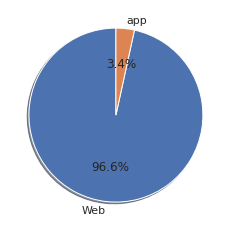

In [ ]:
count=df1.Environment.value_counts()
labels = 'Web','app'
sizes = [count[0]/len(df1),count[1]/len(df1)]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

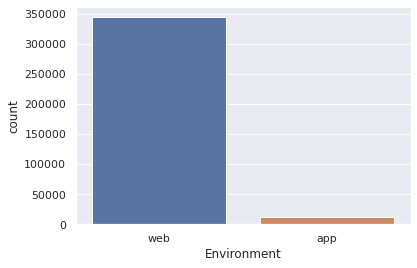

In [ ]:
sns.countplot('Environment' , data = df1)



---



**Os:**

In [ ]:
df1.Os.value_counts()

Windows    161510
Android    112378
iOS         49755
Mac OS      24363
Unknown      5868
Other        2621
Name: Os, dtype: int64

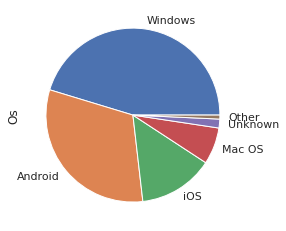

In [ ]:
df1.Os.value_counts().plot.pie()

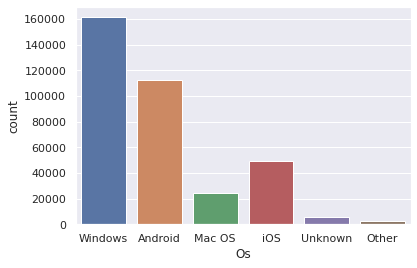

In [ ]:
sns.countplot('Os' , data = df1)



---





**Device:**

In [ ]:
df1.Device.value_counts()

Desktop       188409
Smartphone    114386
Tablet         37275
Unknown        16402
Other             23
Name: Device, dtype: int64

In [ ]:
import plotly.express as px
px.pie(df1, 'Device', color_discrete_sequence=px.colors.sequential.RdBu)

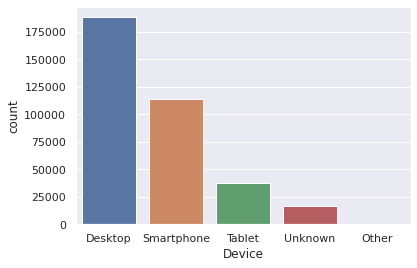

In [ ]:
sns.countplot('Device' , data = df1)



---



**User ID:**

In [ ]:
df1['User ID'].isna().value_counts()

False    356495
Name: User ID, dtype: int64

In [ ]:
len(df1['User ID'].unique())

239386

In [ ]:
df1['User ID'].value_counts()

8002438D7C4E243DA70519A00AFC03BF    52
28E71AD001A5FB0C7CE1871A3DF45B04    51
E596B6B6CCB415811F77DDF2F3FDEE5A    50
D6DB39F0162188D3F4E6D86DFE181136    49
29AE32B755504E271552770186E6F496    47
                                    ..
2867C51D84710C0C15BF08A8C828AA37     1
9DBC1351F9A72CAB7A713D537FD143A9     1
33959BC0F17E577989EA7E7D562F6380     1
4A1DB3CF0D48011C42721B2924DE591D     1
AACA187D5860A0C637FA8D57FBCD3A0A     1
Name: User ID, Length: 239386, dtype: int64

---

**Timestamp:**

In [ ]:
len(df1['Timestamp'].unique())

346185

In [ ]:
df1['Timestamp'].value_counts()

1578853440    4
1574866028    4
1578467495    4
1575125843    4
1575239247    4
             ..
1574694084    1
1573389225    1
1579798359    1
1573917611    1
1576009728    1
Name: Timestamp, Length: 346185, dtype: int64



---



**Campaign ID:**

In [ ]:
df1['Campaign ID'].value_counts()

137914    272314
113450     32059
200094     13885
194906      8350
196251      8204
113890      7420
179971      5263
194905      3685
181696      1074
182460       918
182459       714
181694       710
203946       416
204638       358
196140       352
198525       292
196137       204
194439       116
203945       113
203944        48
Name: Campaign ID, dtype: int64

In [ ]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
px.pie(df1,'Campaign ID')


---

**Context ID:**

In [ ]:
len(df1['Context ID'].unique())

9

In [ ]:
df1['Context ID'].value_counts()

6     116601
9      74309
7      60787
8      56647
0      25735
5      12881
4       6837
2       1434
10      1264
Name: Context ID, dtype: int64

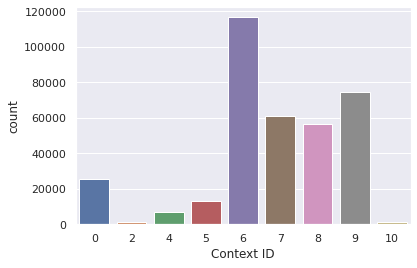

In [ ]:
sns.countplot('Context ID' , data = df1)

---

**Order Value:**

In [ ]:
len(df1['Order Value'].unique())

39980

In [ ]:
df1['Order Value'].value_counts()

33.33     2997
24.99     2815
29.99     1807
41.66     1692
0.00      1668
          ... 
57.00        1
494.79       1
262.08       1
171.53       1
89.12        1
Name: Order Value, Length: 39980, dtype: int64

In [ ]:
df1['Order Value'].sort_values()

49950         0.00
1711          0.00
4115          0.00
57363         0.00
57364         0.00
            ...   
148190     4733.71
29779      5137.00
20         5141.04
232656     5932.15
67463     51658.00
Name: Order Value, Length: 356495, dtype: float64

In [ ]:
len(df1[df1['Order Value']==0])

1668

we have 1668 transactions with an Order Value of zero.

In [ ]:
df1['Order Value'].mean()

75.70002420786258

In [ ]:
df1['Order Value'].max()

51658.00000000002

In [ ]:
df1[df1['Order Value']>6000]

Timestamp Environment  ...                    Transaction ID Order Value
67463  1572369783         app  ...  AF102CD4063A5B48C12E2EAA1664E8F4     51658.0

[1 rows x 9 columns]

We have an abnormal high Order value:

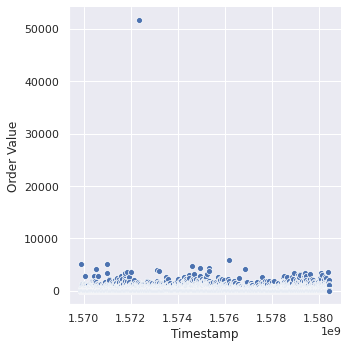

In [ ]:
sns.relplot(x="Timestamp", y="Order Value", data=df1)

We remove transactions with an Order Value of zero as well as Transactions with abnormally high Order .

In [ ]:
df1=df1[(df1['Order Value']<6000) & (df1['Order Value']>0) ]

In [ ]:
df1.shape

(354826, 9)

---

**Transaction ID:**

In [ ]:
df1['Transaction ID'].isna().value_counts()


False    354809
True         17
Name: Transaction ID, dtype: int64

In [ ]:
df1['Transaction ID'].value_counts()

5A991E218E817B55D92B2AF01ED88255    2
4C8D928F6649F0A5D085440B55D69E19    2
5551BFD9F7362921AA8D97ECB1CE254C    2
18A90B7B54D84BB0EBD1BC5770C4EAD4    2
EB07CAB48E29C3269F2F3873AF84D4A3    2
                                   ..
4D427CBE0FA46072A1B8D7FBBBBC5FDC    1
A9B703A4242E8A9389D1BBB7F3DEC96C    1
0784F9BA442126CB69101EEC637D643D    1
C327F3C39D733A2454B984A988ABEB6D    1
AB03A8A7576BD71CF1F0C70902CCDAF0    1
Name: Transaction ID, Length: 354200, dtype: int64

In [ ]:
len(df1['Transaction ID'].unique())

354201

We have duplicated Transactions.We should remove them.

In [ ]:
df1.shape

(354826, 9)

In [ ]:
df1=df1.drop_duplicates(subset='Transaction ID')

In [ ]:
df1.shape

(354201, 9)

---
**1.2 Estimate the time zone of the client:**
---

If we have the IP address for each client, we might be able to guess which timezone their IP address originates from . In this case,having only the timestamp, we can't convert the timestamp data and match it with the corresponding timezone.

---
**1.3 The evolution of the Criteo attributed revenue over time:**
--- 

In [ ]:
df1['Timestamp'].sort_values()

0         1569889040
1         1569890180
2         1569890704
3         1569892066
4         1569892673
             ...    
356490    1580428309
356491    1580428354
356492    1580428713
356493    1580428777
356494    1580428781
Name: Timestamp, Length: 354201, dtype: int64

In [ ]:
df1['Order Value'].sort_values()

261105       0.01
261064       0.01
261220       0.01
261107       0.01
261109       0.01
           ...   
197832    4409.41
148190    4733.71
29779     5137.00
20        5141.04
232656    5932.15
Name: Order Value, Length: 343966, dtype: float64

In [ ]:
data=df1.sort_values(by='Timestamp')
data=data.drop_duplicates(subset='Timestamp')

No handles with labels found to put in legend.


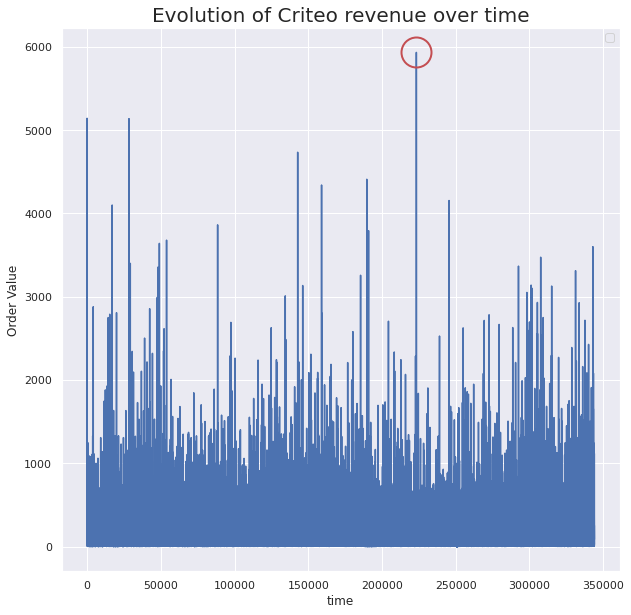

In [ ]:
x = [i for i in range(len(data))]
y=data['Order Value']
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

plt.plot(x, y, color='b')
plt.xlabel("time")
plt.ylabel("Order Value")
plt.title("Evolution of Criteo revenue over time",fontsize=20)

ax.plot(223000, 5932.15, 'o',ms=15 * 2, mec='r', mfc='none', mew=2)

plt.legend()
plt.show()

To simplify the fig , we're going to use periodes of time:

In [ ]:
data=data[['Timestamp','Order Value']]

In [ ]:
data

Timestamp  Order Value
0       1569889040        32.08
1       1569890180       149.92
2       1569890704       125.10
3       1569892066        95.95
4       1569892673        83.54
...            ...          ...
356490  1580428309       113.62
356491  1580428354        33.26
356492  1580428713        35.67
356493  1580428777        54.13
356494  1580428781        16.31

[343966 rows x 2 columns]

In [ ]:
L=[]
i=0
k=0
while i+10000<len(data):
  for i in range (i,i+10000):
    L.append(k)
  k=k+1
  i=i+1
if i<len(data):
  for j in range(i,len(data)):
    L.append(k)
data['periode']=L

In [ ]:
data

Timestamp  Order Value  periode
0       1569889040        32.08        0
1       1569890180       149.92        0
2       1569890704       125.10        0
3       1569892066        95.95        0
4       1569892673        83.54        0
...            ...          ...      ...
356490  1580428309       113.62       34
356491  1580428354        33.26       34
356492  1580428713        35.67       34
356493  1580428777        54.13       34
356494  1580428781        16.31       34

[343966 rows x 3 columns]

In [ ]:
data=data.groupby('periode').agg({'Order Value': 'mean'})

In [ ]:
data

Order Value
periode             
0          75.624688
1          82.101203
2          77.814272
3          76.821601
4          80.971932
5          75.943924
6          76.577525
7          75.748427
8          71.497140
9          73.875061
10         71.921341
11         76.014433
12         74.690660
13         81.796698
14         83.496749
15         78.310477
16         83.296115
17         78.201654
18         82.924690
19         69.119215
20         69.344450
21         68.138194
22         65.308388
23         66.183450
24         65.420177
25         75.556987
26         73.862000
27         76.610532
28         78.541643
29         78.601270
30         80.032165
31         78.861792
32         76.656378
33         79.316593
34         77.306563

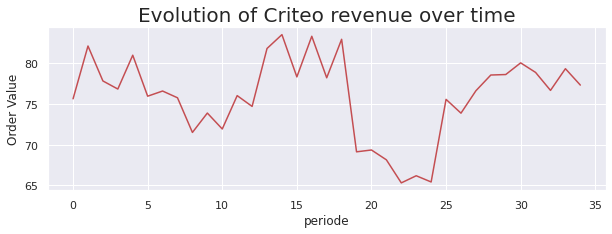

In [ ]:
x = [i for i in range(len(data))]
y=data['Order Value']
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()

plt.plot(x, y, color='r')
plt.xlabel("periode")
plt.ylabel("Order Value")
plt.title("Evolution of Criteo revenue over time",fontsize=20)

plt.show()

---
**1.4 The evolution of the average OV per Os:**
---


In [ ]:
dataOs=df1.dropna(subset=['Transaction ID'])
dataOs=df1[['Os','Order Value']]
dataOs=dataOs.groupby('Os').agg({'Order Value': 'mean'})

In [ ]:
dataOs

Order Value
Os                  
Android    67.075675
Mac OS     98.787313
Other      72.603838
Unknown    66.660107
Windows    77.007400
iOS        82.029573

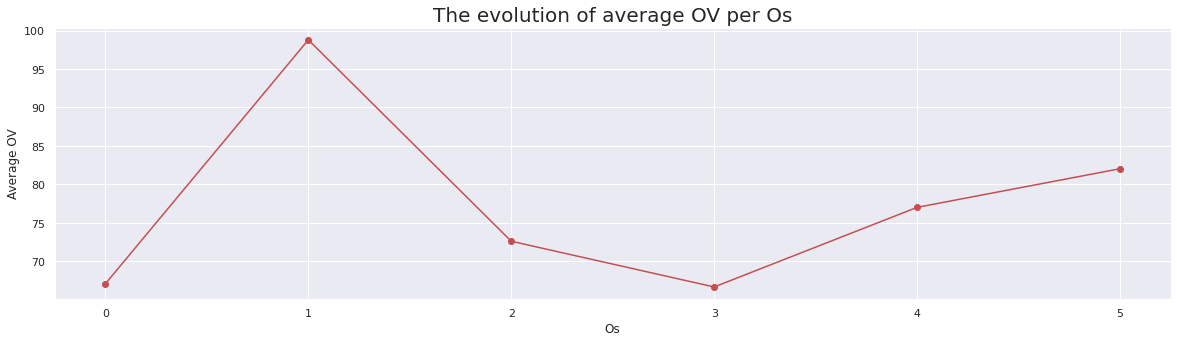

In [ ]:
x = [i for i in range(len(dataOs))]
y=dataOs['Order Value']
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot()

plt.plot(x, y,"o-", color='r')
plt.xlabel("Os")
plt.ylabel("Average OV")
plt.title("The evolution of average OV per Os",fontsize=20)


plt.show()

Mac os have the best average OV .

# **2) Analyze campaigns_delivery:**

In [ ]:
df2=pd.read_csv('/content/gdrive/My Drive/campaigns_delivery.tsv',sep="\t")

In [ ]:
df2.head(10)

Day Environment  ... Criteo Revenue  Criteo Cost
0  2019-10-13         app  ...       1.223468     0.635936
1  2019-10-16         web  ...       0.000000     0.000000
2  2019-11-08         app  ...       0.000000     0.000000
3  2019-10-11         web  ...       1.392722     0.842206
4  2019-10-16         app  ...       0.000000     0.000000
5  2019-10-23         web  ...       0.000000     0.000000
6  2019-11-07         web  ...       0.000000     0.000000
7  2019-11-09         web  ...       0.000000     0.000000
8  2019-11-06         app  ...       0.000000     0.000000
9  2019-10-10         web  ...     929.029971   539.367575

[10 rows x 11 columns]

In [ ]:
df2.columns

Index(['Day', 'Environment', 'Os', 'Campaign ID', 'Campaign Optimization',
       'Campaign Type', 'Context IDs Eligible', 'Number of displays',
       'Number of clicks', 'Criteo Revenue', 'Criteo Cost'],
      dtype='object')

In [ ]:
df2.shape

(8828, 11)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8828 entries, 0 to 8827
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Day                    8828 non-null   object 
 1   Environment            8828 non-null   object 
 2   Os                     8828 non-null   object 
 3   Campaign ID            8828 non-null   int64  
 4   Campaign Optimization  8828 non-null   object 
 5   Campaign Type          8828 non-null   object 
 6   Context IDs Eligible   8828 non-null   object 
 7   Number of displays     8828 non-null   int64  
 8   Number of clicks       8828 non-null   int64  
 9   Criteo Revenue         8828 non-null   float64
 10  Criteo Cost            8828 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 758.8+ KB


In [ ]:
df2.describe()

Campaign ID  Number of displays  ...  Criteo Revenue   Criteo Cost
count    8828.000000        8.828000e+03  ...     8828.000000   8828.000000
mean   164273.597191        2.141655e+05  ...      300.494769    169.976270
std     36342.317697        5.201823e+05  ...      979.402831    564.852979
min    113450.000000        0.000000e+00  ...        0.000000      0.000000
25%    113890.000000        2.500000e+01  ...        0.030000      0.019295
50%    179971.000000        2.806500e+04  ...       24.075285     14.009600
75%    196251.000000        1.604248e+05  ...      168.771213     92.444600
max    204638.000000        6.413055e+06  ...    18055.210806  10587.617563

[8 rows x 5 columns]

In [ ]:
df2.describe(include=['O'])

Day Environment  ...        Campaign Type Context IDs Eligible
count         8828        8828  ...                 8828                 8828
unique         116           3  ...                    5                    5
top     2020-01-28         web  ...  LOWER FUNNEL CUSTOM               0-6,10
freq           118        5261  ...                 4704                 3429

[4 rows x 6 columns]

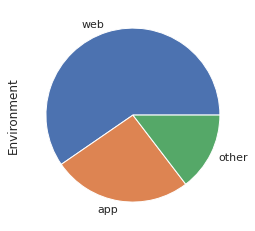

In [ ]:
df2.Environment.value_counts().plot.pie()

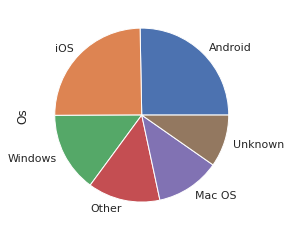

In [ ]:
df2.Os.value_counts().plot.pie()

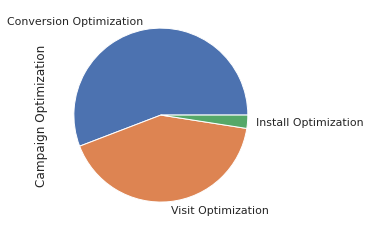

In [ ]:
df2['Campaign Optimization'].value_counts().plot.pie()

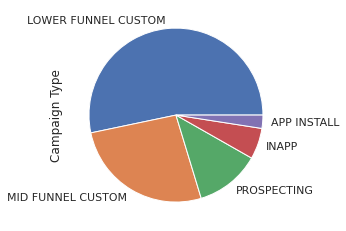

In [ ]:
df2['Campaign Type'].value_counts().plot.pie()

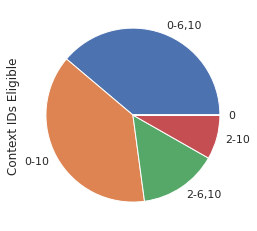

In [ ]:
df2['Context IDs Eligible'].value_counts().plot.pie()

---
**2.1 Compute the average Criteo margin:**
---

In [ ]:
df2['profit']=df2['Criteo Revenue']-df2['Criteo Cost']

In [ ]:
df2.head(10)

Day Environment       Os  ...  Criteo Revenue Criteo Cost      profit
0  2019-10-13         app  Android  ...        1.223468    0.635936    0.587531
1  2019-10-16         web  Windows  ...        0.000000    0.000000    0.000000
2  2019-11-08         app  Android  ...        0.000000    0.000000    0.000000
3  2019-10-11         web   Mac OS  ...        1.392722    0.842206    0.550516
4  2019-10-16         app  Android  ...        0.000000    0.000000    0.000000
5  2019-10-23         web  Android  ...        0.000000    0.000000    0.000000
6  2019-11-07         web  Windows  ...        0.000000    0.000000    0.000000
7  2019-11-09         web  Windows  ...        0.000000    0.000000    0.000000
8  2019-11-06         app      iOS  ...        0.000000    0.000000    0.000000
9  2019-10-10         web  Android  ...      929.029971  539.367575  389.662396

[10 rows x 12 columns]

In [ ]:
Average_margin=df2['profit'].mean()

In [ ]:
Average_margin

130.51849934385925

The average Criteo margin is 130,518.

---
**2.2 Plot the margin over time:**
---

In [ ]:
data2=df2.sort_values(by='Day')

In [ ]:
data2

Day Environment       Os  ...  Criteo Revenue  Criteo Cost       profit
4047  2019-10-07         web      iOS  ...       17.033786     9.788570     7.245215
6460  2019-10-07         web  Windows  ...     7905.957985  4792.584782  3113.373203
8341  2019-10-07         web   Mac OS  ...        1.289095     0.884069     0.405026
6312  2019-10-07         web      iOS  ...      681.591556   405.756166   275.835390
669   2019-10-07         app      iOS  ...       72.308770    39.745127    32.563643
...          ...         ...      ...  ...             ...          ...          ...
4259  2020-01-30         web  Unknown  ...       14.710000     3.235318    11.474683
3773  2020-01-30         web    Other  ...        3.240000    39.437964   -36.197964
1224  2020-01-30         web   Mac OS  ...        0.750000     0.335551     0.414449
6948  2020-01-30       other   Mac OS  ...        0.058473     0.029037     0.029436
1269  2020-01-30       other      iOS  ...        0.000825     0.000724     0.000101

[8828 rows x 12 columns]

**Per Day:**

In [ ]:
L=[]
for i in data2.Day:
  mois=['2019-10-','2019-11-','2019-12-','2020-01-']
  for d in mois :
    if d in i :
      ch=str(mois.index(d))
      L.append(i.replace(d,ch))
data2['date']=L

In [ ]:
data2

Day Environment       Os  ...  Criteo Cost       profit date
4047  2019-10-07         web      iOS  ...     9.788570     7.245215  007
6460  2019-10-07         web  Windows  ...  4792.584782  3113.373203  007
8341  2019-10-07         web   Mac OS  ...     0.884069     0.405026  007
6312  2019-10-07         web      iOS  ...   405.756166   275.835390  007
669   2019-10-07         app      iOS  ...    39.745127    32.563643  007
...          ...         ...      ...  ...          ...          ...  ...
4259  2020-01-30         web  Unknown  ...     3.235318    11.474683  330
3773  2020-01-30         web    Other  ...    39.437964   -36.197964  330
1224  2020-01-30         web   Mac OS  ...     0.335551     0.414449  330
6948  2020-01-30       other   Mac OS  ...     0.029037     0.029436  330
1269  2020-01-30       other      iOS  ...     0.000724     0.000101  330

[8828 rows x 13 columns]

In [ ]:
newdf=data2[['profit','date']]

In [ ]:
newdf

profit date
4047     7.245215  007
6460  3113.373203  007
8341     0.405026  007
6312   275.835390  007
669     32.563643  007
...           ...  ...
4259    11.474683  330
3773   -36.197964  330
1224     0.414449  330
6948     0.029436  330
1269     0.000101  330

[8828 rows x 2 columns]

In [ ]:
newdf=newdf.groupby('date').agg({'profit': 'mean'})

In [ ]:
newdf

profit
date            
007   157.466916
008    52.994543
009    73.331879
010    95.639007
011    92.977819
...          ...
326   126.381262
327    87.852518
328    74.162636
329    94.197571
330    78.923686

[116 rows x 1 columns]

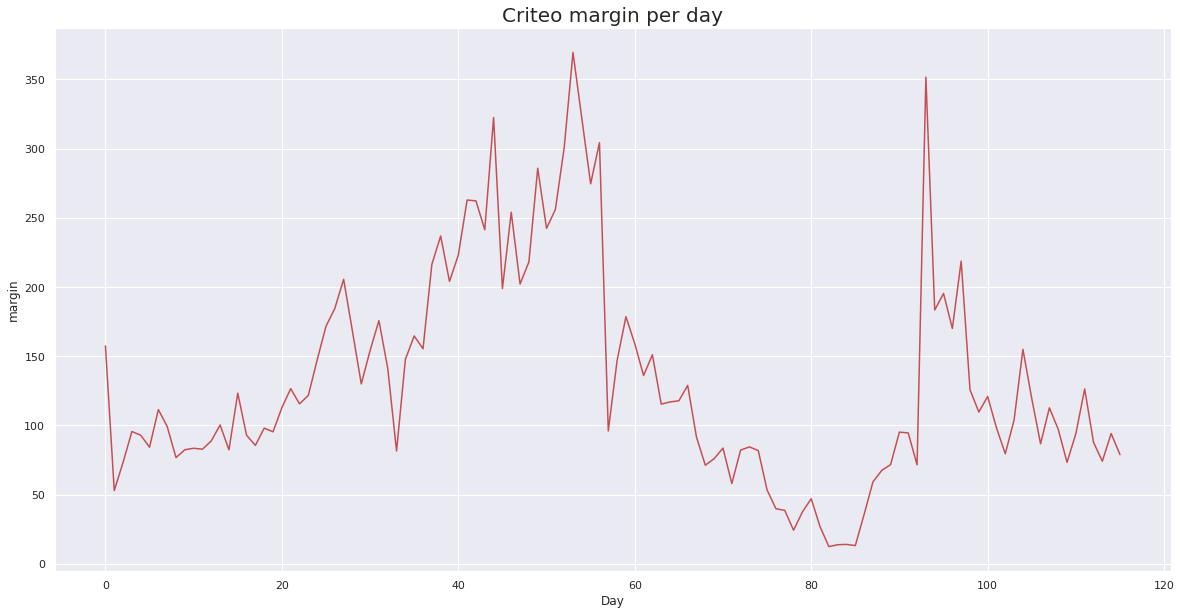

In [ ]:
x = [i for i in range(len(newdf))]
y=newdf['profit']
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

plt.plot(x, y, color='r')
plt.xlabel("Day")
plt.ylabel("margin")
plt.title("Criteo margin per day",fontsize=20)

plt.show()

In [ ]:
len(newdf)

116

**Per week:**

In [ ]:
L=[]
i=0
week=0
while i+7<len(newdf):
  for i in range (i,i+7):
    L.append(week)
  week=week+1
  i=i+1
if i<len(newdf):
  for j in range(i,len(newdf)):
    L.append(week)



In [ ]:
len(L)

116

In [ ]:
newdf['week']=L

In [ ]:
newdf

profit  week
date                  
007   157.466916     0
008    52.994543     0
009    73.331879     0
010    95.639007     0
011    92.977819     0
...          ...   ...
326   126.381262    15
327    87.852518    16
328    74.162636    16
329    94.197571    16
330    78.923686    16

[116 rows x 2 columns]

In [ ]:
newdf=newdf.groupby('week').agg({'profit': 'mean'})

In [ ]:
newdf

profit
week            
0      95.459162
1      87.736977
2      98.660081
3     153.289555
4     142.662179
5     209.047419
6     242.736151
7     292.940811
8     167.454395
9     102.573130
10     69.082724
11     28.709996
12     50.970289
13    183.631465
14    113.353741
15    101.439788
16     83.784103

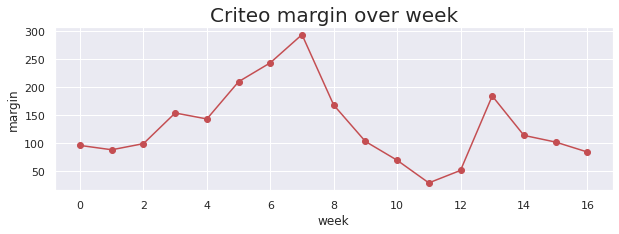

In [ ]:
x = [i for i in range(len(newdf))]
y=newdf['profit']
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot()

plt.plot(x, y,"o-", color='r')
plt.xlabel("week")
plt.ylabel("margin")
plt.title("Criteo margin over week",fontsize=20)

plt.show()

The second graph is more stable , the margin over week will be better to qualify Criteo margin. 

---
**2.3 Plot the margin by Criteo product:**
---

In [ ]:
df2

Day Environment       Os  ...  Criteo Revenue Criteo Cost    profit
0     2019-10-13         app  Android  ...        1.223468    0.635936  0.587531
1     2019-10-16         web  Windows  ...        0.000000    0.000000  0.000000
2     2019-11-08         app  Android  ...        0.000000    0.000000  0.000000
3     2019-10-11         web   Mac OS  ...        1.392722    0.842206  0.550516
4     2019-10-16         app  Android  ...        0.000000    0.000000  0.000000
...          ...         ...      ...  ...             ...         ...       ...
8823  2019-11-19         web  Android  ...        0.000000    0.000000  0.000000
8824  2019-11-19         web  Windows  ...        0.000000    0.000000  0.000000
8825  2019-10-17       other    Other  ...        0.004939    0.002743  0.002196
8826  2019-11-14         web      iOS  ...        0.000000    0.000000  0.000000
8827  2019-11-15         web      iOS  ...        0.000000    0.000000  0.000000

[8828 rows x 12 columns]

In [ ]:
newdf2=df2[['Campaign Type','profit']]

In [ ]:
newdf2=newdf2.groupby('Campaign Type').agg({'profit': 'mean'})


In [ ]:
newdf2

profit
Campaign Type                  
APP INSTALL            4.731557
INAPP                 22.336251
LOWER FUNNEL CUSTOM  184.417137
MID FUNNEL CUSTOM     93.087085
PROSPECTING           51.862421

In [ ]:
newdf2.index

Index(['APP INSTALL', 'INAPP', 'LOWER FUNNEL CUSTOM', 'MID FUNNEL CUSTOM',
       'PROSPECTING'],
      dtype='object', name='Campaign Type')

Text(60, 60, 'The App Install margin')

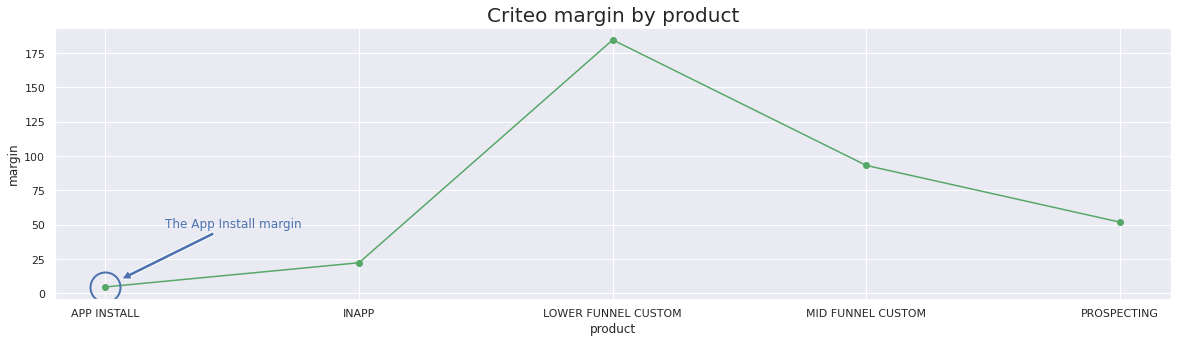

In [ ]:
x = [i for i in newdf2.index]
y=newdf2['profit']


fig, ax = plt.subplots(figsize=(20, 5))

plt.plot(x, y,"o-", color='g')
plt.xlabel("product")
plt.ylabel("margin")
plt.title("Criteo margin by product",fontsize=20)

ax.plot(0, 4.731557, 'o',ms=15 * 2, mec='b', mfc='none', mew=2)
ax.annotate('The App Install margin', xy=(0,4.731557), xytext=(60, 60),textcoords='offset points',color='b', size='large',
            arrowprops=dict(arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor='b', shrinkB=15 * 1.2))



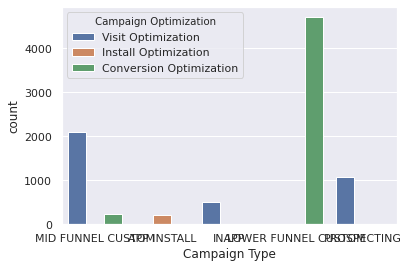

In [ ]:
sns.countplot('Campaign Type' ,hue='Campaign Optimization', data = df2);

App install campaigns have the lowest order value.
This may be due to the campaign optilmization .In fact install optimization is the only optimization that app install Criteo campaigns is set to optimize for.


# **3) Join the 2 datasets:**

In [ ]:
df=pd.merge(df1,df2)

In [ ]:
df.head()

Timestamp Environment       Os  ... Criteo Revenue  Criteo Cost      profit
0  1569889040         web  Windows  ...    2293.247236  1320.873010  972.374226
1  1569889040         web  Windows  ...    1441.775243   812.069900  629.705343
2  1569889040         web  Windows  ...     325.487455   188.981562  136.505892
3  1569889040         web  Windows  ...     485.802541   285.085894  200.716647
4  1569889040         web  Windows  ...    1404.454606   784.938012  619.516594

[5 rows x 18 columns]

In [ ]:
df.columns

Index(['Timestamp', 'Environment', 'Os', 'Device', 'Campaign ID', 'User ID',
       'Context ID', 'Transaction ID', 'Order Value', 'Day',
       'Campaign Optimization', 'Campaign Type', 'Context IDs Eligible',
       'Number of displays', 'Number of clicks', 'Criteo Revenue',
       'Criteo Cost', 'profit'],
      dtype='object')

In [ ]:
df.shape

(39279420, 18)

# **4) Analyze Criteo Campaigns Performance from the advertiser’s perspective:**

---
**4.1 Identify the most performing campaigns:**
---


In [ ]:
mydf=df[['Campaign ID','Order Value','profit']]

In [ ]:
mydf=mydf.groupby('Campaign ID').agg({'profit': 'mean', 'Order Value':'max'})


In [ ]:
mydf

profit  Order Value
Campaign ID                          
113450        464.738202      4100.03
113890         86.800833      3102.73
137914       1632.032571      5141.04
179971         99.349506      2696.64
181694         12.308345       365.63
181696          9.223633       203.33
182459         26.711237      2000.42
182460         24.839775      1088.89
194439         11.652944       652.16
194905         88.639572      3678.35
194906         86.724757      2319.62
196137         26.537164       623.84
196140         24.777075      1368.30
196251        202.955157      5932.15
198525          3.599218      1344.59
200094        228.433068      2716.67
203944          0.111549      1266.00
203945          1.219529       761.24
203946          1.644816      1100.00
204638         24.212026      1110.42

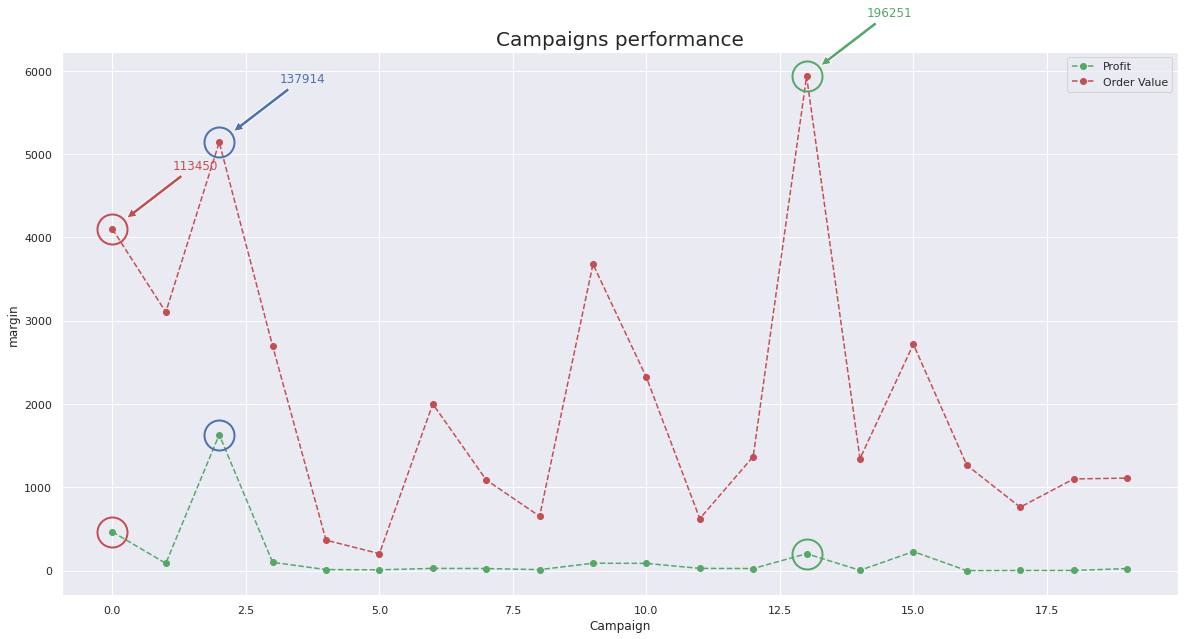

In [ ]:
x = [i for i in range(len(mydf))]
y1=mydf['profit']
y2=mydf['Order Value']
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

plt.plot(x, y1,"o--", color='g',label="Profit")
plt.plot(x, y2,"o--", color='r',label="Order Value")

plt.xlabel("Campaign")
plt.ylabel("margin")

plt.title("Campaigns performance",fontsize=20)

ax.plot(2, 1632.032571, 'o',ms=15 * 2, mec='b', mfc='none', mew=2)
ax.plot(2, 5141.04, 'o',ms=15 * 2, mec='b', mfc='none', mew=2)
ax.plot(13, 202.955157, 'o',ms=15 * 2, mec='g', mfc='none', mew=2)
ax.plot(13, 5932.15, 'o',ms=15 * 2, mec='g', mfc='none', mew=2)
ax.plot(0, 464.738202, 'o',ms=15 * 2, mec='r', mfc='none', mew=2)
ax.plot(0, 4100.03, 'o',ms=15 * 2, mec='r', mfc='none', mew=2)

ax.annotate(mydf.index[0], xy=(0, 4100.03), xytext=(60, 60),textcoords='offset points',color='r', size='large',
            arrowprops=dict(arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor='r', shrinkB=15 * 1.2))
ax.annotate(mydf.index[2], xy=(2, 5141.04), xytext=(60, 60),textcoords='offset points',color='b', size='large',
            arrowprops=dict(arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor='b', shrinkB=15 * 1.2))
ax.annotate(mydf.index[13], xy=(13, 5932.15), xytext=(60, 60),textcoords='offset points',color='g', size='large',
            arrowprops=dict(arrowstyle='simple,tail_width=0.3,head_width=0.8,head_length=0.8',
                facecolor='g', shrinkB=15 * 1.2))
plt.legend()
plt.show()

The most performing campaigns are campaigns the pinpointed IDs : 113450 , 137914 ,196251




---
**4.2 Criteo campaign types that perform the best:**
---

In [ ]:
df[df['Campaign ID']==137914]['Campaign Type']

1947756     LOWER FUNNEL CUSTOM
1947757     LOWER FUNNEL CUSTOM
1947758     LOWER FUNNEL CUSTOM
1947759     LOWER FUNNEL CUSTOM
1947760     LOWER FUNNEL CUSTOM
                   ...         
36866881    LOWER FUNNEL CUSTOM
36866882    LOWER FUNNEL CUSTOM
36866883    LOWER FUNNEL CUSTOM
36866884    LOWER FUNNEL CUSTOM
36866885    LOWER FUNNEL CUSTOM
Name: Campaign Type, Length: 31581928, dtype: object

In [ ]:
df[df['Campaign ID']==113450]['Campaign Type']

0           LOWER FUNNEL CUSTOM
1           LOWER FUNNEL CUSTOM
2           LOWER FUNNEL CUSTOM
3           LOWER FUNNEL CUSTOM
4           LOWER FUNNEL CUSTOM
                   ...         
36850409    LOWER FUNNEL CUSTOM
36850410    LOWER FUNNEL CUSTOM
36850411    LOWER FUNNEL CUSTOM
36850412    LOWER FUNNEL CUSTOM
36850413    LOWER FUNNEL CUSTOM
Name: Campaign Type, Length: 3718728, dtype: object

In [ ]:
df[df['Campaign ID']==196251]['Campaign Type']

37419783    MID FUNNEL CUSTOM
37419784    MID FUNNEL CUSTOM
37419785    MID FUNNEL CUSTOM
37419786    MID FUNNEL CUSTOM
37419787    MID FUNNEL CUSTOM
                  ...        
38281479    MID FUNNEL CUSTOM
38281480    MID FUNNEL CUSTOM
38281481    MID FUNNEL CUSTOM
38281482    MID FUNNEL CUSTOM
38281483    MID FUNNEL CUSTOM
Name: Campaign Type, Length: 825791, dtype: object

We notice that Campaigns with type LOWER FUNNEL CUSTOM or MID FUNNEL CUSTOM perform the best.

---
**4.3 The COS/ROAS metric:**
---

The COS/ROAS is not a relevant metric to look at for all Criteo campaign types because they haven't a fix margins and costs .
Instead I recommend looking at ROI metric.

